In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
res = pd.read_csv('results_40000.csv', header=None)

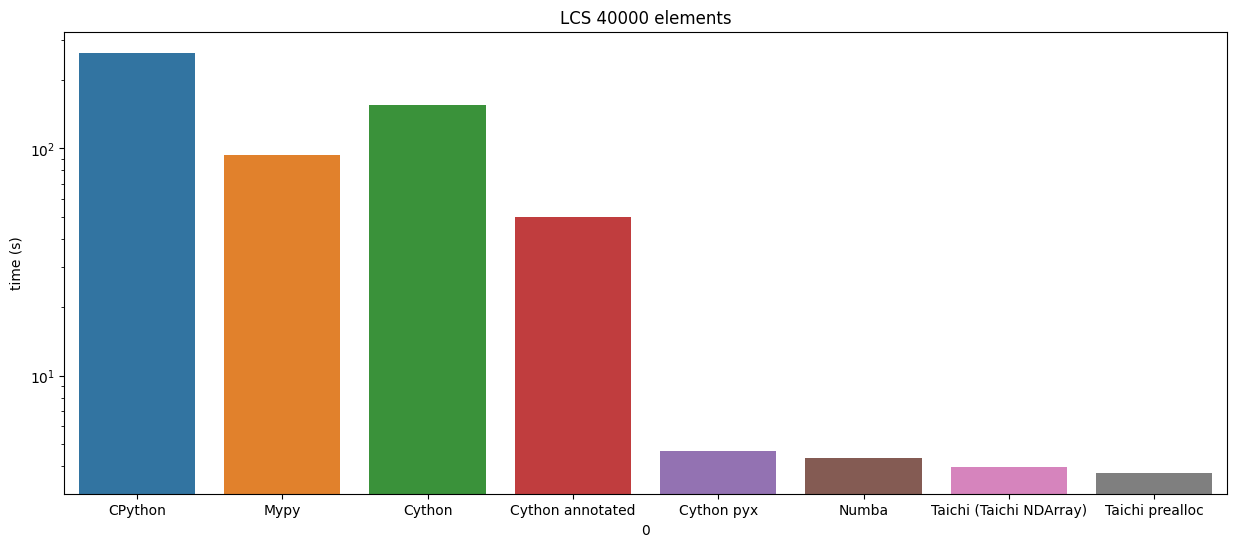

In [3]:
plt.figure(figsize=(15,6))
plt.yscale("log")
ax = sns.barplot(x=res[0], y=res[2])
ax.set(ylabel="time (s)", title="LCS 40000 elements")
plt.show()

In [4]:
y = 1./res[2]

In [18]:
speedup = y/y[0]
cpp = 5.02897
scpp = (1./cpp)/y[0]

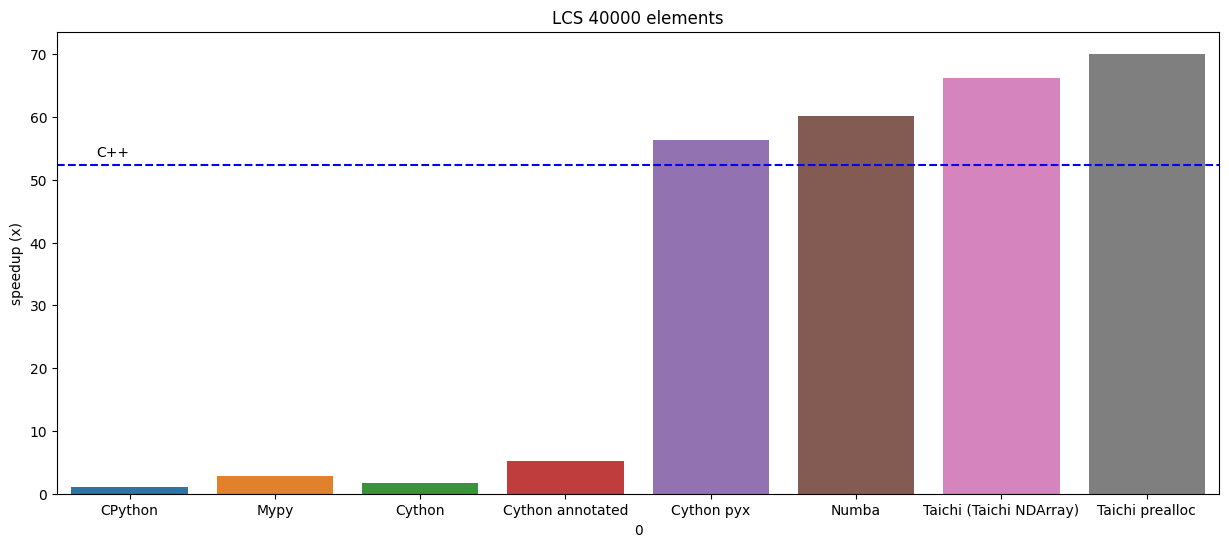

In [25]:
plt.figure(figsize=(15,6))
ax = sns.barplot(x=res[0], y=speedup)
ax.set(ylabel="speedup (x)", title="LCS 40000 elements")
plt.axhline(y =scpp, color = 'b', linestyle = 'dashed', label="C++")
ax.text(0,scpp + 2, "C++",
        ha="right", va="center")
plt.show()